In [1]:
!pip install -U scikit-learn

     ---------------------------------------- 8.3/8.3 MB 2.9 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 2.6 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\sharm\\anaconda3\\Lib\\site-packages\\~klearn\\decomposition\\_cdnmf_fast.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [70]:
import pandas as pd
import warnings
warnings.filterwarnings(action = 'ignore')
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("churn_prediction_simple.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22067 entries, 0 to 22066
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     22067 non-null  int64  
 1   vintage                         22067 non-null  int64  
 2   age                             22067 non-null  int64  
 3   gender                          22067 non-null  int64  
 4   dependents                      22067 non-null  float64
 5   occupation                      22067 non-null  int64  
 6   city                            22067 non-null  float64
 7   customer_nw_category            22067 non-null  int64  
 8   branch_code                     22067 non-null  int64  
 9   days_since_last_transaction     22067 non-null  float64
 10  current_balance                 22067 non-null  float64
 11  previous_month_end_balance      22067 non-null  float64
 12  average_monthly_balance_prevQ   

In [36]:
#separating the dependent and the independent variables
X = data.drop(columns=['churn','customer_id'])
Y= data['churn']


In [37]:
# scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)


In [38]:
#splitting the dataset
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test= tts(scaled_X, Y, train_size = 0.80, stratify=Y,random_state=101)
x_train.shape, x_test.shape, y_train.shape,y_test.shape
# __stratify__ means Y means that both test and train will
# contain the target variables in equal distribution

((17653, 19), (4414, 19), (17653,), (4414,))

# Model Building 

In [21]:
from sklearn.ensemble import BaggingClassifier as BC
classifier = BC()
classifier.fit(x_train,y_train)

BaggingClassifier()

In [22]:
classifier.get_params()

{'base_estimator': 'deprecated',
 'bootstrap': True,
 'bootstrap_features': False,
 'estimator': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# base_estimator: 
# Requires a machine learning model, 
# which will be used with the bootstap data
#NONE means Decision tree is used

# bootstrap =True
#most important aspect of bagging technique
# thats why it is True.

# bootstrap_features:
#originally the characteristic feature of random forest
# but now avalaible to be used with other algos as well.
# really shines when combined with Decision trees.

#max_samples: 
#deals with the max. number of samples each MOdel should recieve.
#this defines the fraction of data originally given.
# here it is one becoz we want each model should recieve same size of data

# n_estimators:
# the number of models to be build for training over the data.

# n_jobs
# the number of CPU cores one wants,
# to use during the trainig of BaggingClassifier.
# specifing it to -1 means all the availabe CPU cores will be used.


# Bagging Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression as LR
classifier = BC(base_estimator = LR(),
               n_estimators = 150,
               n_jobs=-1,
               random_state=42)
classifier.fit(x_train,y_train)
predicted_values = classifier.predict(x_train)

___Classifcation report of Training___

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_train,predicted_values))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90     14234
           1       0.75      0.08      0.15      3419

    accuracy                           0.82     17653
   macro avg       0.78      0.54      0.52     17653
weighted avg       0.80      0.82      0.75     17653



___Classiifcation report of Testing___

In [27]:
predicted_values=classifier.predict(x_test)
print(classification_report(y_test,predicted_values))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90      3559
           1       0.78      0.09      0.16       855

    accuracy                           0.82      4414
   macro avg       0.80      0.54      0.53      4414
weighted avg       0.81      0.82      0.76      4414



As we can see the F1 score is very less.                
But Bagging was suppose to do a very good job ,                    
considering the fact that there are 150 models behind this predictions

__SO WHAT HAPPENED??__                                          
Remember the model that we are using is Linear and yet not passed            
feature transformation and feature engineering.                    
Therefore, each Logistic Regression with Bagging is __Underfitting the data.__


# Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier as RFC
classifier = RFC()

In [55]:
classifier.fit(x_train,y_train)

RandomForestClassifier()

In [47]:
classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [48]:
print(y_train.shape, len(predicted_values))

(17653,) 4414


In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_train,predicted_values))

ValueError: Found input variables with inconsistent numbers of samples: [17653, 4414]

In [52]:
predicted_values= classifier.predict(x_test)
print(classification_report(y_test,predicted_values))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      3559
           1       0.71      0.45      0.55       855

    accuracy                           0.86      4414
   macro avg       0.79      0.70      0.73      4414
weighted avg       0.85      0.86      0.84      4414



__Q. HOW DOES THE BAGGING PARAMETERS AFFECT THE MACHINE LEARNING MODELS?__
> to know this , we will again be using two functions:                
>> calc_score()           
>> effect()

In [56]:
from sklearn.metrics import f1_score
def calc_score(model,x1,y1,x2,y2):
    
    model.fit(x1,y1)
    
    predict = model.predict(x1)
    f1 = f1_score(y1,predict)
    
    predict = model.predict(x2)
    f2 = f1_score(y2,predict)
    
    return f1,f2

In [59]:
def effect(train_score,test_score,x_axis,title):
    plt.figure(figsize = (7,4), dpi = 120)
    plt.plot(x_axis,train_score,color='red',label='train_Score')
    plt.plot(x_axis,test_score,color='blue',label='test_Score')
    plt.title(title)
    plt.legend()
    plt.xlabel('parameter_value')
    plt.ylabel('f1 score')
    plt.show()

# Hyperparameter Tuning

In [60]:
classifier = RFC()
classifier.fit(x_train,y_train)

RandomForestClassifier()

In [61]:
classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Estimators

In [68]:
estimators= [i for i in range(1,600,10)]
train=[]
test=[]
for i  in estimators:
    model = RFC(class_weight='balanced_subsample',
               n_estimators=i,
               n_jobs=-1,
               max_depth=7,
               random_state=101)
    f1,f2=calc_score(model,x_train,y_train,x_test,y_test)
    train.append(f1)
    test.append(f2)

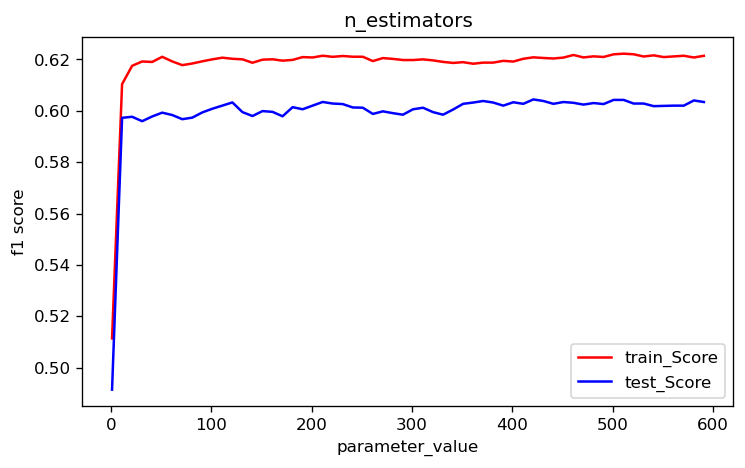

In [71]:
effect(train,test,range(1,600,10),'n_estimators')

### max_samples

In [72]:
maxsamples = [i/1000 for i in range(1,1000)]
train=[]
test=[]
for i  in maxsamples:
    model = RFC(class_weight='balanced_subsample',
               n_estimators=50,
               n_jobs=-1,
               max_samples=i,
               max_depth=7,
               random_state=101)
    f1,f2=calc_score(model,x_train,y_train,x_test,y_test)
    train.append(f1)
    test.append(f2)

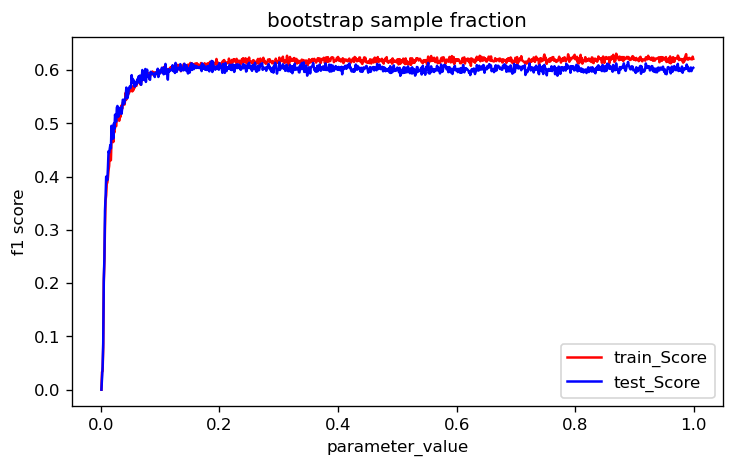

In [73]:
effect(train,test,maxsamples,'bootstrap sample fraction')

### max_features

In [75]:
maxfeatures = range(1,X.shape[1])
train=[]
test=[]
for i  in maxfeatures:
    model = RFC(class_weight='balanced_subsample',
               n_estimators=50,
               n_jobs=-1,
               max_depth=7,
               random_state=101,
               max_features=i)
    f1,f2=calc_score(model,x_train,y_train,x_test,y_test)
    train.append(f1)
    test.append(f2)

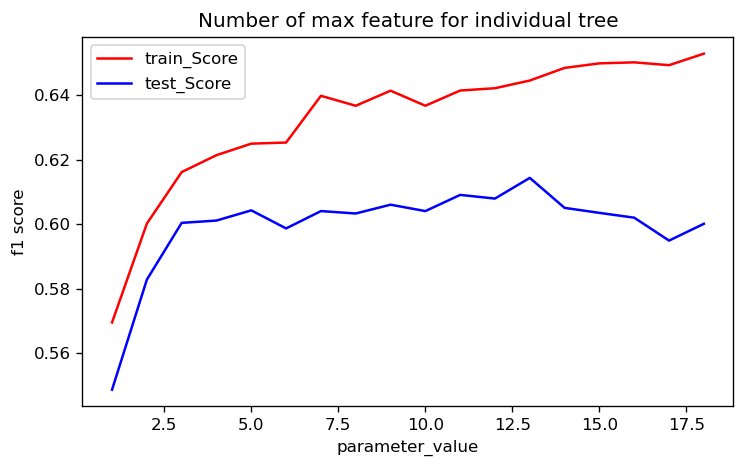

In [78]:
effect(train,test,maxfeatures,'Number of max feature for individual tree')